In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("/Users/mariantoinettefr/Documents/conference/basedata/training/dravidian architecture/1.jpg")

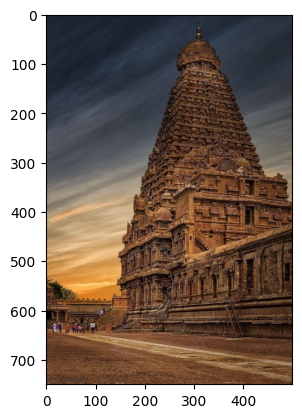

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("/Users/mariantoinettefr/Documents/conference/basedata/training/dravidian architecture/1.jpg").shape

(750, 499, 3)

In [5]:
train = ImageDataGenerator(rescale=1/145)
validation = ImageDataGenerator(rescale=1/145)

In [6]:
train_dataset = train.flow_from_directory('/Users/mariantoinettefr/Documents/conference/basedata/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/Users/mariantoinettefr/Documents/conference/basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
                                                             tf.keras.layers.MaxPool2D(2,2),
                                                             #
                                                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu' ),
                                                             tf.keras.layers.MaxPool2D(2,2),
                                                             #
                                                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu' ),
                                                             tf.keras.layers.MaxPool2D(2,2),
                                                             ##
                                                             tf.keras.layers.Flatten(),
                                                             ##
                                                             tf.keras.layers.Dense(512,activation= 'relu' ),
                                                             ##
                                                             tf.keras.layers.Dense(1,activation= 'sigmoid' )
                                                             ])

In [8]:
from tensorflow.keras.optimizers.legacy import RMSprop

# Use the legacy RMSprop optimizer and set the learning rate
optimizer = RMSprop(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 0s 162ms/step - loss: 0.2990 - accuracy: 0.8889 - val_loss: 0.2473 - val_accuracy: 0.9000
Epoch 2/30
3/3 [==============================] - 0s 137ms/step - loss: 0.4727 - accuracy: 0.7778 - val_loss: 0.2104 - val_accuracy: 0.9500
Epoch 3/30
3/3 [==============================] - 0s 136ms/step - loss: 0.1237 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 143ms/step - loss: 0.1250 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9500
Epoch 5/30
3/3 [==============================] - 0s 137ms/step - loss: 0.5327 - accuracy: 0.7778 - val_loss: 0.2472 - val_accuracy: 0.8000
Epoch 6/30
3/3 [==============================] - 0s 132ms/step - loss: 0.5067 - accuracy: 0.5000 - val_loss: 0.1412 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 143ms/step - loss: 0.1087 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 1.0000
Epoch 8/30
3/3 [====

Error processing .DS_Store: cannot identify image file <_io.BytesIO object at 0x2d599e4d0>


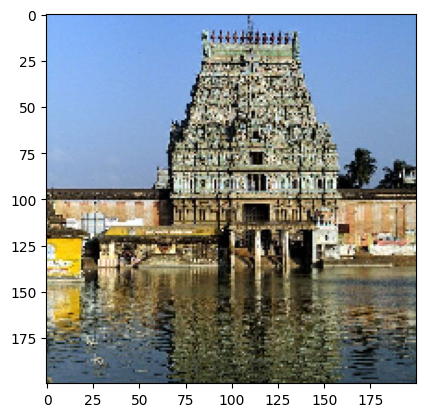

1/1 [==============================] - 0s 17ms/step
It is a Non-Dravidian Architecture Style


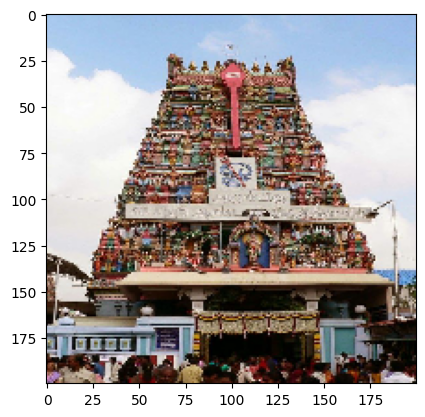

1/1 [==============================] - 0s 16ms/step
It is a Non-Dravidian Architecture Style


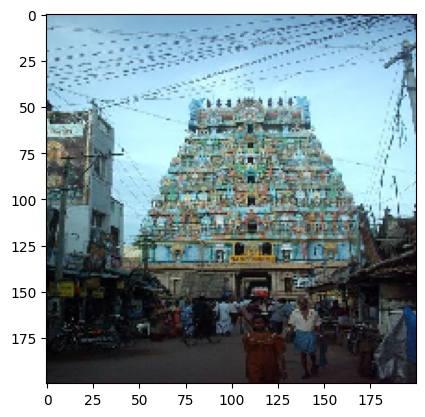

1/1 [==============================] - 0s 17ms/step
It is a Dravidian Architecture Style


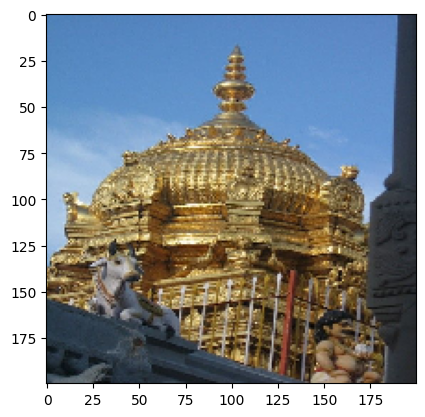

1/1 [==============================] - 0s 18ms/step
It is a Non-Dravidian Architecture Style


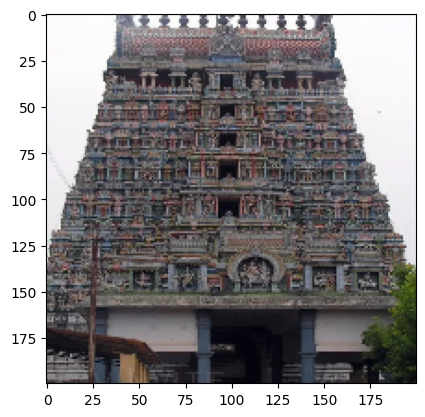

1/1 [==============================] - 0s 16ms/step
It is a Non-Dravidian Architecture Style


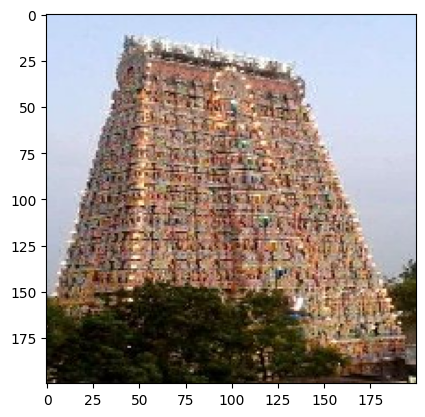

1/1 [==============================] - 0s 15ms/step
It is a Non-Dravidian Architecture Style


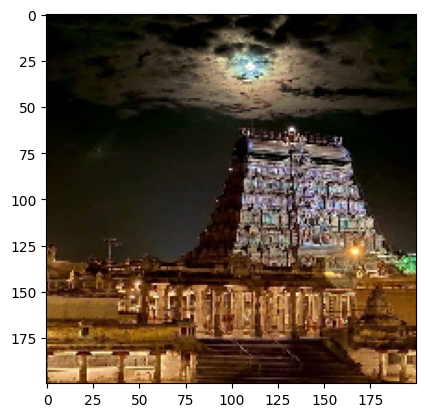

1/1 [==============================] - 0s 16ms/step
It is a Dravidian Architecture Style


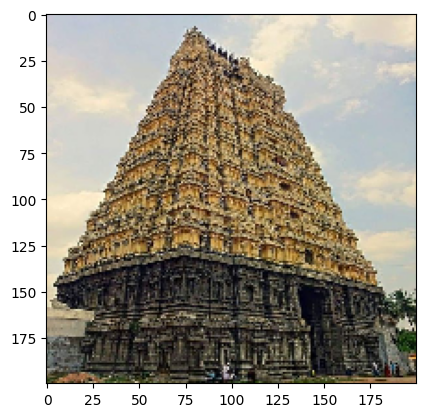

1/1 [==============================] - 0s 18ms/step
It is a Dravidian Architecture Style


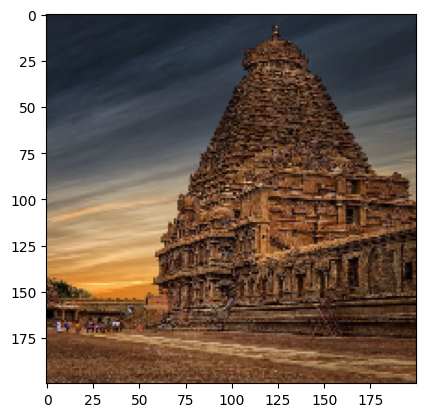

1/1 [==============================] - 0s 17ms/step
It is a Dravidian Architecture Style


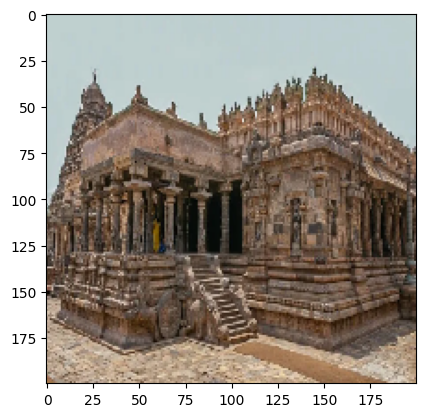

1/1 [==============================] - 0s 18ms/step
It is a Dravidian Architecture Style


In [30]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

dir_path = '/Users/mariantoinettefr/Documents/conference/basedata/test'

for i in os.listdir(dir_path):
    try:
        img = image.load_img(dir_path + '/' + i, target_size=(200, 200))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)

        if val == 0:
            print("It is a Dravidian Architecture Style")
        else:
            print("It is a Non-Dravidian Architecture Style")

    except Exception as e:
        print(f"Error processing {i}: {e}")